In [1]:
#Python Implementation for Database Cleaning
import pandas as pd
import numpy as np
 #load data set
df = pd.read_csv("C:/Users/adari/Downloads/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Data Inspection and Exploration
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [5]:
#Check the data information using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#From the above data info we can see that Age and Cabin have an unequal number of counts.
#And some of the columns are categorical and have data type objects and some are integer and float values.

In [11]:
#Check the Categorical and Numerical Columns.
#categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('categorical columns:',cat_col)

num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [13]:
#Check the total number of Unique Values in the Categorical Columns
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [15]:
#Drop Name and Ticket Columns
df1 = df.drop(columns=['Name','Ticket'])
df1.shape

(891, 10)

In [17]:
#Let's check the missing values columns-wise for each row using df.isnull()
round((df1.isnull().sum()/df1.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [ ]:
#from the above result that Cabin has 77% null values and Age has 19.87% and Embarked has 0.22% of null values.
#So, it's not a good idea to fill 77% of null values. So we will drop the Cabin column. 
#Embarked column has only 0.22% of null values so, we drop the null values rows of Embarked column

In [19]:
df2 = df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
df2.shape

(889, 9)

In [ ]:
#Mean imputation is suitable when the data is normally distributed and has no extreme outliers.
#Median imputation is preferable when the data contains outliers or is skewed.

In [21]:
# Mean imputation
df3 = df2.fillna(df2.Age.mean())
# Let's check the null values again
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#Handling Outliers
#we usually use box plot to identify outliers. And Techniques such as clustering, interpolation or transformation can be used to handle outliers.
#The line inside the box denotes the median while the box itself denotes the interquartile range (IQR). The box plot extend to the most extreme non-outlier values within 1.5 times the IQR.
#Individual points beyond the box are considered potential outliers.


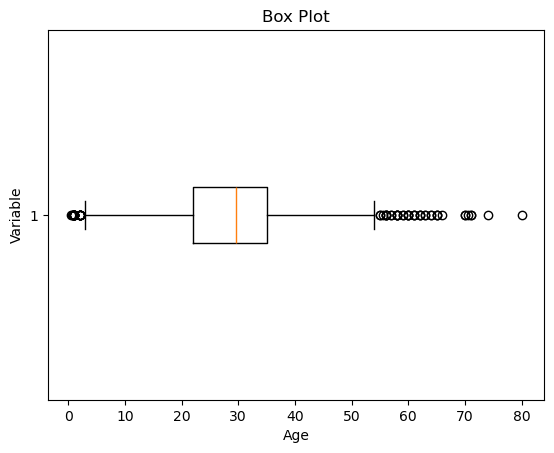

In [23]:
# plot the box plot for Age column data.
import matplotlib.pyplot as plt

plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [ ]:
#As we can see from the above Box and whisker plot, Our age dataset has outliers values. The values less than 5 and more than 55 are outliers.

In [25]:
# calculate summary statistics
mean = df3['Age'].mean()
std  = df3['Age'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
df4 = df3[(df3['Age'] >= lower_bound) 
                & (df3['Age'] <= upper_bound)]

Lower Bound : 3.705400107925648
Upper Bound : 55.578785285332785


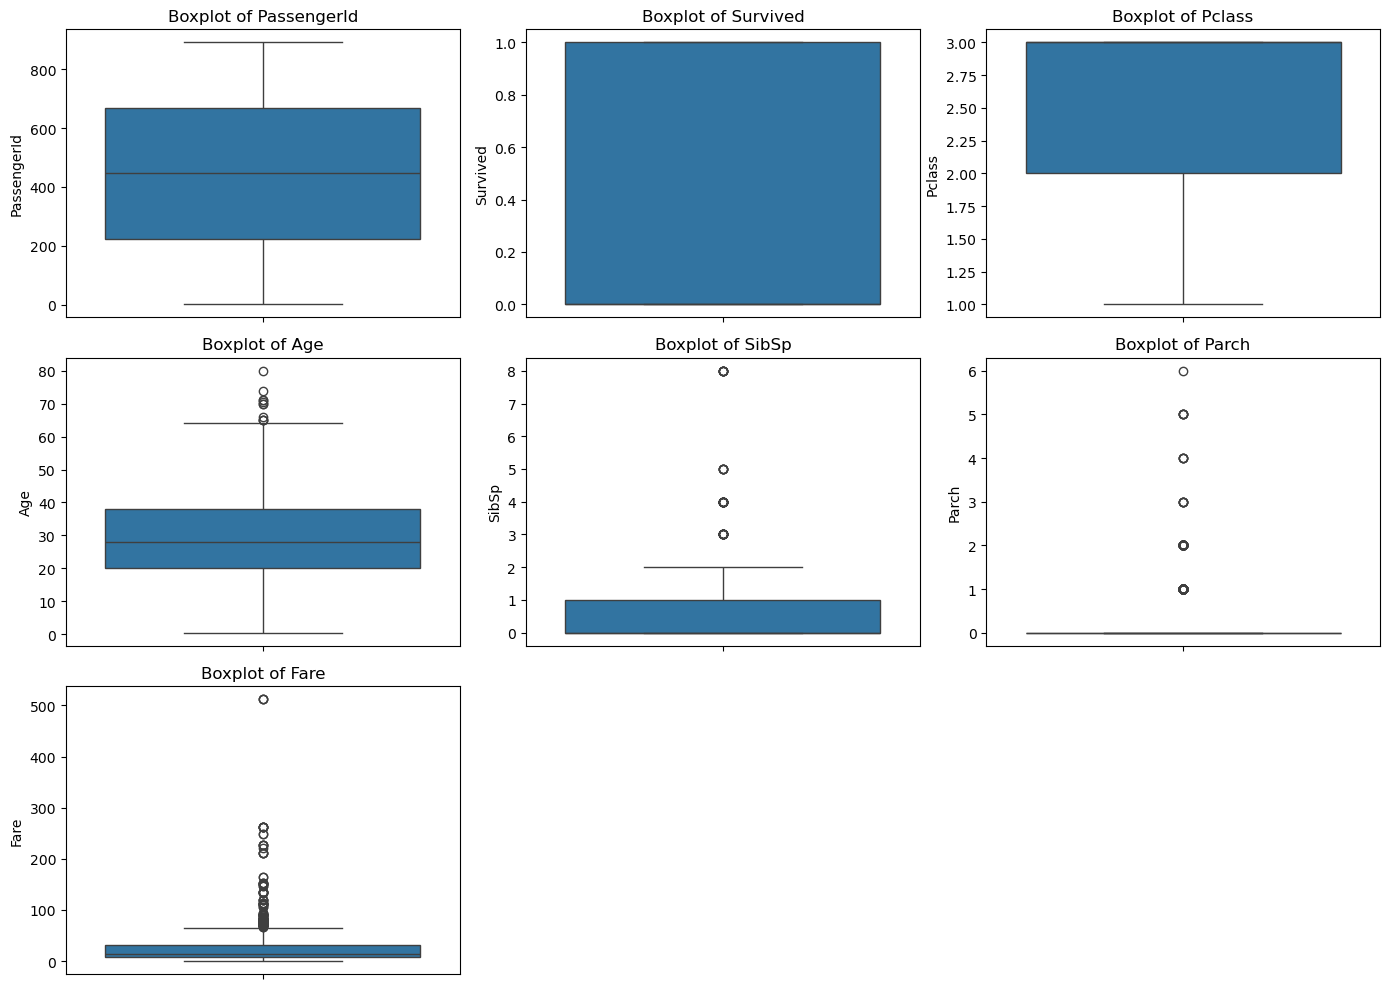

In [27]:
#remove the outliers of the remaining columns.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called df
cols_to_check = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(14, 10))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [29]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
#Drop outliers using Mean ± 3*Std for each column
df_cleaned = df.copy()

for col in numeric_cols:
    mean = df_cleaned[col].mean()
    std = df_cleaned[col].std()
    
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
print("Original shape:", df.shape)
print("After removing outliers:", df_cleaned.shape)


Original shape: (891, 12)
After removing outliers: (657, 12)


In [ ]:
#machine learning prediction we separate independent and target features. 
#Here we will consider only 'Sex' 'Age' 'SibSp', 'Parch' 'Fare' 'Embarked' only as the independent features and Survived as target variables because PassengerId will not affect the survival rate.


In [33]:
X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']

In [ ]:
#Data formatting involves converting the data into a standard format or structure that can be easily processed by the algorithms or models used for analysis
#commonly used data formatting techniques i.e. Scaling and Normalization.
#Common scaling methods include Min-Max scaling and Standardization (Z-score scaling).
#Min-Max Scaling: Min-Max scaling rescales the values to a specified range, typically between 0 and 1.
#It preserves the original distribution and ensures that the minimum value maps to 0 and the maximum value maps to 1.


In [37]:
from sklearn.preprocessing import MinMaxScaler

# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X.copy()
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


In [ ]:
#Standardization (Z-score scaling): Standardization transforms the values to have a mean of 0 and a standard deviation of 1. 
#It centers the data around the mean and scales it based on the standard deviation.
# Z = (X - μ) / σ
# X = Data
# μ = Mean value of X
# σ = Standard deviation of X